In [1]:
import pandas as pd

df = pd.read_csv("Pima_Indians_Diabetes_Database.csv")

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
feature = df[df.keys().drop('Outcome')]
outcome = df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_target, test_target = train_test_split(feature, outcome, random_state=42, stratify=outcome)

In [9]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

In [10]:
clf.fit(train_feature, train_target)

AdaBoostClassifier()

In [11]:
y_pred = clf.predict(test_feature)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print("Precision :",precision_score(test_target, y_pred))
print("Recall :",recall_score(test_target, y_pred))
print("F1 score :",f1_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[1,0]))

Accuracy : 0.734375
Precision : 0.6379310344827587
Recall : 0.5522388059701493
F1 score : 0.5920000000000001
[[ 37  30]
 [ 21 104]]


In [13]:
print(clf.feature_importances_)

[0.04 0.18 0.12 0.02 0.12 0.16 0.22 0.14]


In [14]:
clf.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

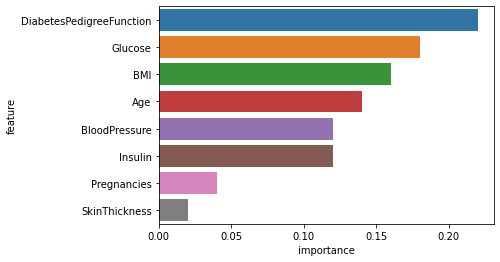

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.DataFrame()
importances['feature']=clf.feature_names_in_
importances['importance']=clf.feature_importances_
importances.sort_values('importance', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
sns.barplot(x='importance',y='feature', data=importances)
plt.show()

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

clf2 = GradientBoostingClassifier()

In [17]:
clf2.fit(train_feature, train_target)

GradientBoostingClassifier()

In [18]:
y_pred = clf2.predict(test_feature)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print("Precision :",precision_score(test_target, y_pred))
print("Recall :",recall_score(test_target, y_pred))
print("F1 score :",f1_score(test_target, y_pred))
print(confusion_matrix(test_target, y_pred,labels=[1,0]))

Accuracy : 0.7291666666666666
Precision : 0.6271186440677966
Recall : 0.5522388059701493
F1 score : 0.5873015873015873
[[ 37  30]
 [ 22 103]]


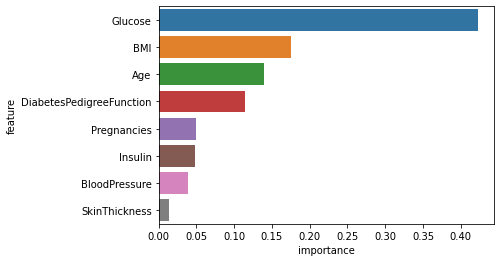

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

importances = pd.DataFrame()
importances['feature']=clf2.feature_names_in_
importances['importance']=clf2.feature_importances_
importances.sort_values('importance', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
sns.barplot(x='importance',y='feature', data=importances)
plt.show()